Homework set 1
coding of exercise 3,4,5

In [2]:
import numpy as np
from random import random
import matplotlib.pyplot as plt
from scipy import integrate

Populating the interactive namespace from numpy and matplotlib


c:\Users\86177\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


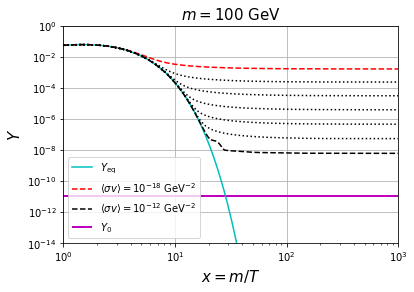

In [1]:
%pylab inline  
import numpy as np
from numpy import arange
from scipy.integrate import odeint
import pandas as pd
from scipy import optimize

# parameters
M = 100                                #GeV Singlet Mass
Mp = 1.22e19                            #GeV Planck Mass
dfg=pd.DataFrame([
    {'T':1E-1,'geff_to_half':4.2},
    {'T':1,'geff_to_half':8.7},
    {'T':100,'geff_to_half':10.2}
    ])
f=lambda T,a,b,c:a/(1+np.exp(-b*(T-c)))
B,σ=optimize.curve_fit(f,dfg['T'],dfg['geff_to_half'],p0=(0,0,0))
gs_to_half= lambda T: f(T,a=B[0],b=B[1],c=B[2])
T=np.logspace(np.log10(1E-1),np.log10(100))
plt.semilogx(dfg['T'],dfg['geff_to_half'],'ro')
plt.plot(T,gs_to_half(T) )
plt.xlabel('$T$ [GeV]',size=15)
plt.ylabel(r'$g_*^{1/2}$',size=15)
# parameters
from scipy import misc
m=100;Mp=1.22e19
global k
k=1
fk=lambda σv:np.sqrt(np.pi*Mp**2/45)*m*σv
def BEx(x,m=100):
    T=m/x
    return k*gs_to_half(T)/x**2
def Yeq(x):
    return 0.145*x**(3/2)*np.exp(-x)
def BE(Y,x):
    return -(Y**2-Yeq(x)**2)*BEx(x)
from scipy import integrate
xx=np.logspace(np.log10(1),np.log10(1000),1000)
plt.loglog(xx,Yeq(xx),'c',label=r'$Y_{\rm eq}$')

k=fk(σv=1E-18)
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'r--',label=r'$\langle \sigma v \rangle = 10^{-18}\ {\rm GeV}^{-2}$')
k=fk(σv=1E-17)
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'k:')
k=fk(σv=1E-16)
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'k:')
k=fk(σv=1E-15)
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'k:')
k=fk(σv=1E-14)
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'k:')
k=fk(σv=1E-13)
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'k:')
k=fk(σv=1E-12)
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'k--',
          label=r'$\langle \sigma v \rangle = 10^{-12}\ {\rm GeV}^{-2}$')
plt.hlines(1E-11,1,1000,linestyles='-',color='m',lw=2,label='$Y_0$')
plt.ylim(1E-14,1)
plt.xlim(1,1000)
plt.xlabel('$x = m/T$', size= 15)
plt.ylabel('$Y$', size= 15)
plt.title('$m = 100$ GeV', size= 15)
plt.legend()
plt.grid()



0.8862269117895689


<function matplotlib.pyplot.show(close=None, block=None)>

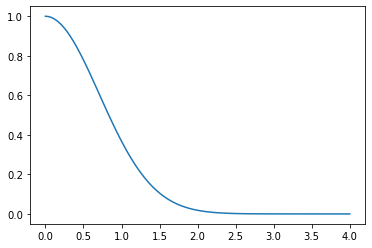

In [3]:
#exercise 3
def f(x):
    return np.exp(-x**2)
I,error=integrate.quad(f,0,4)
print(I)
x=np.linspace(0,4,100)
plt.plot(x,f(x))
plt.show

In [5]:
#Estimate the integral in 1d
N=10000
error_sum=0
sum=0
x=4*np.random.rand(N)
xi=f(x)
for i in range(N):
    sum=sum+xi[i]
Integral=4*sum/N
xi_std = np.std(xi,ddof=1)
errorbar=xi_std/(N)**(1/2)
print(Integral,errorbar)

0.8868289325390948 0.003288647747669602


In [6]:
#Estimate the integral in 2d
N=10000
x=4*np.random.rand(N)
y=np.random.rand(N)
N_inside=0
for i in range(N):
    if y[i]<=f(x[i]):
        N_inside=N_inside+1
p=N_inside/N
Integral=4*p
var=(N_inside*(1-p)**2+(N-N_inside)*p**2)/(N-1)
errorbar=var**(1/2)/(N)**(1/2)
print(Integral,errorbar)

0.8952 0.004168104282444351


In [7]:
#exercise 4
N=1000000
N_inside=0
for i in range(N):
    r_2=0
    x=2*np.random.rand(10)-1
    for j in range(10):
        r_2=r_2+x[j]**2
    r=r_2**(1/2)
    if r<=1:
        N_inside=N_inside+1
p=N_inside/N
V=2**10*p
var=(N_inside*(1-p)**2+(N-N_inside)*p**2)/(N-1)
errorbar=var**(1/2)/(N)**(1/2)
print(V,errorbar)

2.49856 4.933608044878347e-05


In [8]:
#compare to the exact solution:
V10=np.pi**5/120
error=V-V10
print(error)
#10**(-2)数量级的不准

-0.05160403987734519


In [9]:
#exercise 5
N=10000
sum=0
xi=np.zeros(N)
def f(x):
    return np.exp(-x)
for i in range(N):
    r_2=0
    x=2*np.random.rand(10)
    for j in range(10):
        r_2=r_2+x[j]**2
    sum=sum+f(r_2)
    xi[i]=f(r_2)
Integral=2**10*sum/N
xi_std = np.std(xi,ddof=1)
errorbar=xi_std/(N)**(1/2)
print(Integral,errorbar)


0.2796398471230881 2.784962994526115e-05


In [12]:
#compare to the exact result:
I=0.28515868
error=I-Integral
print(error)
#误差数量级在10**(-3)

0.0055188328769119055
